In [227]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Read in data set, explore

In [280]:
# Load the processed data

df_churn = pd.read_csv('churn_data1.csv')

In [281]:
df_churn.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,Churn,Gender,SeniorCitizen,Contract,Partner,Depend,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,4cb75839-4807-45e3-a9da-794e9ce53972,34536072f30ba5acb148becdfc5a0c34,23176,37.57039,-76.42148,Wake,VA,331,Middlesex,Urban,America/New_York,"Production designer, theatre/television/film",1,68,Regular High School Diploma,Full Time,21242.88,Married,DarkCyan,JCB 16 digit,Yes,Female,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,89.979239,577.760466,3,3,2,2,2,4,2,3
1,2,S120509,84632dbc-39c2-4b11-b840-577fd97ef223,2a6346e985cb7a3f29678436fcd66912,30114,34.24692,-84.52571,Canton,GA,53210,Cherokee,Suburban,America/New_York,Radiation protection practitioner,0,70,Associate's Degree,Full Time,5832.98,Married,LightPink,VISA 16 digit,No,Male,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,94.973002,138.171459,2,2,2,3,4,1,2,2
2,3,K191035,cf372768-93dc-4021-a0c0-8222b6f5d53b,8eebc9f5cdff8d844fa63f873954d459,25253,38.92317,-81.96954,Letart,WV,2230,Mason,Urban,America/New_York,Industrial/product designer,1,86,Associate's Degree,Student,39798.11,Married,OldLace,Mastercard,Yes,Male,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,99.947583,1587.135294,2,3,3,2,4,2,2,3


In [282]:
#df_churn.describe()
#df_churn.dtypes

In [283]:
# Define features and target variables

X = df_churn.drop('Churn',axis=1)   #Feature Matrix
Y = df_churn['Churn']          #Target Variable

# Print dimensions
print(X.shape)
print(Y.shape)

(10000, 49)
(10000,)


# Feature Engineering

In [284]:
# Transform Y to 0/1

Y = pd.Series(np.where(Y.values=='Yes',1,0))

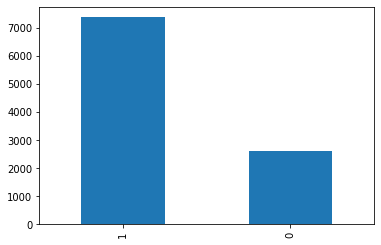

In [285]:
# Percent counts of Y
Y.value_counts().plot(kind='bar')

In [286]:
# X columns

# Continuous cols (normalize-for KNN)

cols_cont = ['Population', 'Children', 'Income', 'Age', 'Tenure', 'TotalCharge']

# Lat/Long cols (leave as is)
cols_lat_long = ['Lat', 'Lng']#, 'TotalCharge_cat']

# Yes/No cols Transform  to 0/1
cols_yes_no = ['SeniorCitizen', 'Partner', 'Depend', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling']

for col in cols_yes_no:
    X[col] = np.where(X[col]=='Yes',1,0)
    
# Categorical cols (create dummies)
cols_cat = ['Area', 'Gender', 'Education', 'Employment', 'Marital', 'Contract', 'InternetService', 'PaymentMethod'] #no Credit_card
#cols_cat = ['Area', 'Gender', 'Employment', 'Education', 'Marital', 'Credit_card', 'Contract', 'InternetService', 'PaymentMethod']

In [287]:
# Combine non-Cat cols

X_noncat = X[cols_cont + cols_lat_long + cols_yes_no]
X_noncat.head(3)

,Population,Children,Income,Age,Tenure,TotalCharge,Lat,Lng,SeniorCitizen,Partner,Depend,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling
0,331,1,21242.88,68,6.795513,577.760466,37.57039,-76.42148,0,1,1,1,0,1,1,0,0,0,1
1,53210,0,5832.98,70,1.156681,138.171459,34.24692,-84.52571,1,0,1,1,1,1,0,0,0,1,1
2,2230,1,39798.11,86,15.754144,1587.135294,38.92317,-81.96954,1,1,0,1,1,0,0,0,0,0,1


In [288]:
# Create dummies-for categorical cols

X_cat = pd.get_dummies(X[cols_cat], drop_first=True)

In [289]:
# Join Cat and Noncat together

X_all = pd.concat([X_noncat, X_cat],axis=1)
X_all.head()

,Population,Children,Income,Age,Tenure,TotalCharge,Lat,Lng,SeniorCitizen,Partner,Depend,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,Area_Suburban,Area_Urban,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,331,1,21242.88,68,6.795513,577.760466,37.57039,-76.42148,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1,53210,0,5832.98,70,1.156681,138.171459,34.24692,-84.52571,1,0,1,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2230,1,39798.11,86,15.754144,1587.135294,38.92317,-81.96954,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
3,30493,0,12503.37,25,17.087227,1789.877504,40.19247,-74.71581,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,582,1,25201.82,66,1.670972,115.286908,38.24685,-97.34622,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Train/Test Split Data

In [290]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, Y,
    test_size=0.3,
    random_state=1
)

In [291]:
# Print dimensions

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 48)
(3000, 48)
(7000,)
(3000,)


In [292]:
X_train.head(3)

,Population,Children,Income,Age,Tenure,TotalCharge,Lat,Lng,SeniorCitizen,Partner,Depend,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,Area_Suburban,Area_Urban,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
2228,1930,1,18848.95,48,9.526371,831.644832,45.01889,-83.77216,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5910,856,0,132721.98,69,69.833318,7022.883043,43.11854,-73.30679,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1950,986,4,1904.64,69,1.770031,227.728116,43.18770,-94.18825,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


# Predictive Modeling Techniques

# 1. KNN

This section covers KNN

In [331]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsClassifier

# Load the metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report

In [332]:
# Scale the data for cols_cont 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() #MinMaxScaler()

X_train_std = X_train.copy() #copy train features df for KNN
X_test_std = X_test.copy()  #copy test features df for KNN
X_train_std[cols_cont] = scaler.fit_transform(X_train_std[cols_cont]) 
X_test_std[cols_cont] = scaler.transform(X_test_std[cols_cont])

X_train_std.head(3)

,Population,Children,Income,Age,Tenure,TotalCharge,Lat,Lng,SeniorCitizen,Partner,Depend,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,Area_Suburban,Area_Urban,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
2228,-0.547116,-0.515964,-0.756185,-0.258758,-0.947131,-0.966322,45.01889,-83.77216,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5910,-0.620638,-0.980557,3.302808,0.753469,1.336839,1.496189,43.11854,-73.30679,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1950,-0.611738,0.877815,-1.360163,0.753469,-1.240883,-1.206524,43.18770,-94.18825,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [333]:
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_std, y_train) #Note: only X_train is std (not y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [296]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = knn.predict(X_test_std)
y_prob = knn.predict_proba(X_test_std)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)


total accuracy = 69.5%
total precision = 78.3%
total recall = 81.0%
auc = 0.65%


# 2. Decision Tree

This section covers Decision Trees

In [334]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
# Train a Random Forest

tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [299]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)

total accuracy = 77.0%
total precision = 81.0%
total recall = 89.6%
auc = 0.76%


# 3. Random Forest 

This section covers Random Forest

In [336]:
from sklearn.ensemble import RandomForestClassifier

In [337]:
# Train a Random Forest

forest = RandomForestClassifier(
    n_estimators=100,
    max_features=15,
    max_depth=5,
    random_state=1,
)
forest.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [302]:
# Print overall test-set accuracy, precision, recall, auc
y_pred = forest.predict(X_test)
y_prob = forest.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
print('total accuracy = {:.1f}%'.format(acc))
print('total precision = {:.1f}%'.format(precision))
print('total recall = {:.1f}%'.format(recall))

auc = roc_auc_score(y_test, y_prob)
print('auc = {:.2f}%'.format(auc))
#confusion_matrix(y_test, y_pred)

total accuracy = 78.2%
total precision = 81.7%
total recall = 90.6%
auc = 0.78%


## Feature Importance for Random Forest

In [303]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp[:10]

InternetService_Fiber Optic    0.313299
Tenure                         0.276349
TotalCharge                    0.258879
InternetService_None           0.017677
Population                     0.016794
Lng                            0.015965
Income                         0.015116
Contract_Two Year              0.013827
Lat                            0.013472
Age                            0.012438
dtype: float64

No handles with labels found to put in legend.


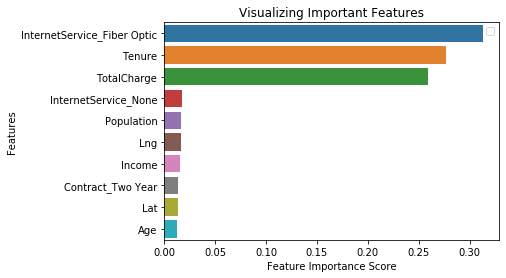

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Extra - Hyperparameter Tuning (Grid Search)


## KNN

### Gridsearch (to find best K value)

In [305]:
from sklearn.model_selection import GridSearchCV, cross_val_score
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5, scoring='accuracy')
model.fit(X_train_std,y_train)
print('best parameter: ', list(model.best_params_.values())[0])
model.best_estimator_
print('best score: ', model.best_score_)
#model.cv_results_['mean_test_score']

best parameter:  11
best score:  0.7361428571428572


### Fit best model (using cross-validation, alternative to train/test split)

In [306]:
knn = KNeighborsClassifier(n_neighbors=11)
scores = cross_val_score(knn, X_train_std, y_train, cv=5, scoring='accuracy')

print(scores)
print('mean accuracy= {:.2f}%'.format(scores.mean()))

[0.72714286 0.73928571 0.74071429 0.72642857 0.74714286]
mean accuracy= 0.74%


# Decision Tree

In [325]:
from sklearn.model_selection import GridSearchCV, cross_val_score
params = {'max_depth':[3,4,5,6,7,8]}

tree = DecisionTreeClassifier()

model = GridSearchCV(tree, params, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

print('best parameter: ', list(model.best_params_.values())[0])
model.best_estimator_
print('best score: ', model.best_score_)
#model.cv_results_['mean_test_score']

best parameter:  3
best score:  0.782


In [326]:
model.cv_results_ #['mean_test_score']

{'mean_fit_time': array([0.01923161, 0.02020912, 0.02437043, 0.02811623, 0.03257561,
        0.03621173]),
 'std_fit_time': array([0.00175764, 0.00013436, 0.00029879, 0.00011489, 0.00058024,
        0.00033339]),
 'mean_score_time': array([0.00125799, 0.00104575, 0.00107613, 0.00107155, 0.00115023,
        0.00112643]),
 'std_score_time': array([1.74825996e-04, 4.18388672e-05, 6.66756813e-05, 2.91665352e-05,
        6.08397500e-05, 1.61080645e-05]),
 'param_max_depth': masked_array(data=[3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8}],
 'split0_test_score': array([0.78071429, 0.77071429, 0.78142857, 0.76714286, 0.76357143,
        0.73785714]),
 'split1_test_score': array([0.78285714, 0.78      , 0.77714286, 0.76714286, 0.75714286,
        0.75714286]),
 'split2_test_score'

In [327]:
tree = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

print(scores)
print('mean accuracy= {:.3f}%'.format(scores.mean()))

[0.77071429 0.78       0.77285714 0.79285714 0.77357143]
mean accuracy= 0.778%


In [321]:
l = [0.78071429, 0.78285714, 0.78285714, 0.79214286,0.77142857]
sum(l) / len(l)

0.7819999999999999

## Random Forest

### Note: this takes a few moments to run (more selections = more time)

In [309]:
from sklearn.model_selection import GridSearchCV, cross_val_score
params = {
        'max_depth': [4, 6, 8, 10],
        #'min_samples_split': [2, 5, 10, 12],
        'n_estimators': [80, 120],
        'max_features': [10,12,15,18]
}

forest = RandomForestClassifier()

model = GridSearchCV(forest, params, cv=5, scoring='accuracy')
model.fit(X_train,y_train)
print('best parameter (max_depth): ', list(model.best_params_.values())[0])
#print('best parameter (min_samples_split): ', list(model.best_params_.values())[1])
print('best parameter (n_estimators): ', list(model.best_params_.values())[2])
print('best parameter (max_features): ', list(model.best_params_.values())[1])
model.best_estimator_
print('best score: ', model.best_score_)
#model.cv_results_['mean_test_score']

best parameter (max_depth):  8
best parameter (n_estimators):  120
best parameter (max_features):  12
best score:  0.7838571428571428


In [311]:
forest = RandomForestClassifier(max_depth=6, n_estimators=120, max_features=15)
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')

print(scores)
print('mean accuracy= {:.3f}%'.format(scores.mean()))

[0.77928571 0.78785714 0.78       0.78714286 0.76857143]
mean accuracy= 0.781%


### Print parameters from Gridsearch 

In [278]:
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Ensemble models (build your own ensemble)

In [348]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators = [('knn', knn), ('forest', forest), ('tree', tree)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [349]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.777